<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-582254-1694707243/blob/main/Assign5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

LOAD THE DATASET

In [98]:
df = pd.read_csv("Mall_Customers.csv")

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [100]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [101]:
df.shape

(200, 5)

In [102]:
df = df.drop("CustomerID", axis=1)

Data preprocessing

In [103]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [104]:
df = pd.get_dummies(df, columns=["Gender"], drop_first=True)


In [105]:
df.head(10)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
5,22,17,76,0
6,35,18,6,0
7,23,18,94,0
8,64,19,3,1
9,30,19,72,0


In [106]:
columns_of_interest = {'Age',	'Annual Income (k$)',	'Spending Score (1-100)', 'Gender_Male'}

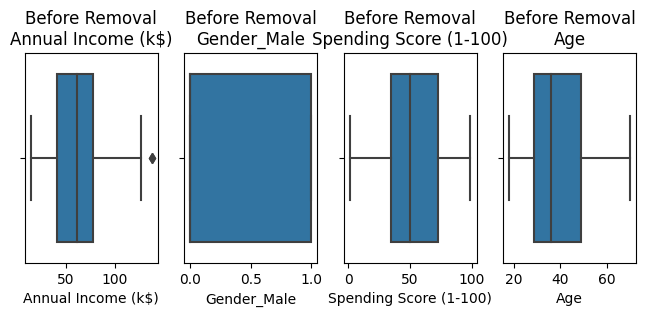

In [107]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(2, 6, i)
    sns.boxplot(x=df[column])
    plt.title(f'Before Removal\n{column}')

In [108]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [109]:
df = remove_outliers(df, columns_of_interest)

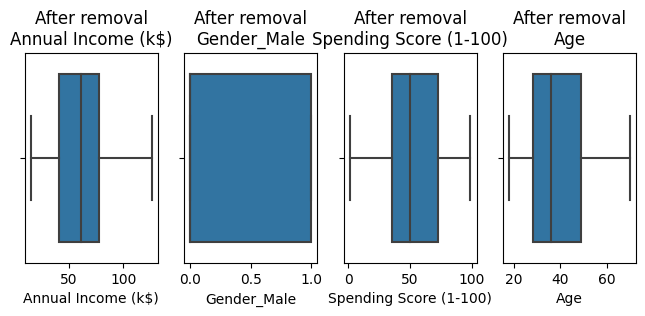

In [110]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(2, 6, i)
    sns.boxplot(x=df[column])
    plt.title(f'After removal\n{column}')

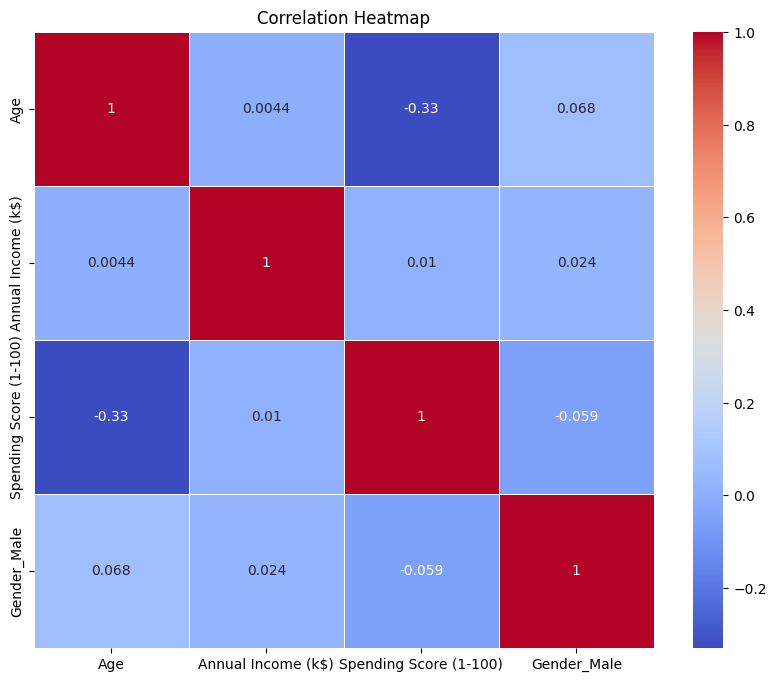

In [111]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [112]:
df.shape

(198, 4)

<ipython-input-113-351d68a5dad8>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.pairplot(df[columns_of_interest], diag_kind='kde', markers='o', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:16

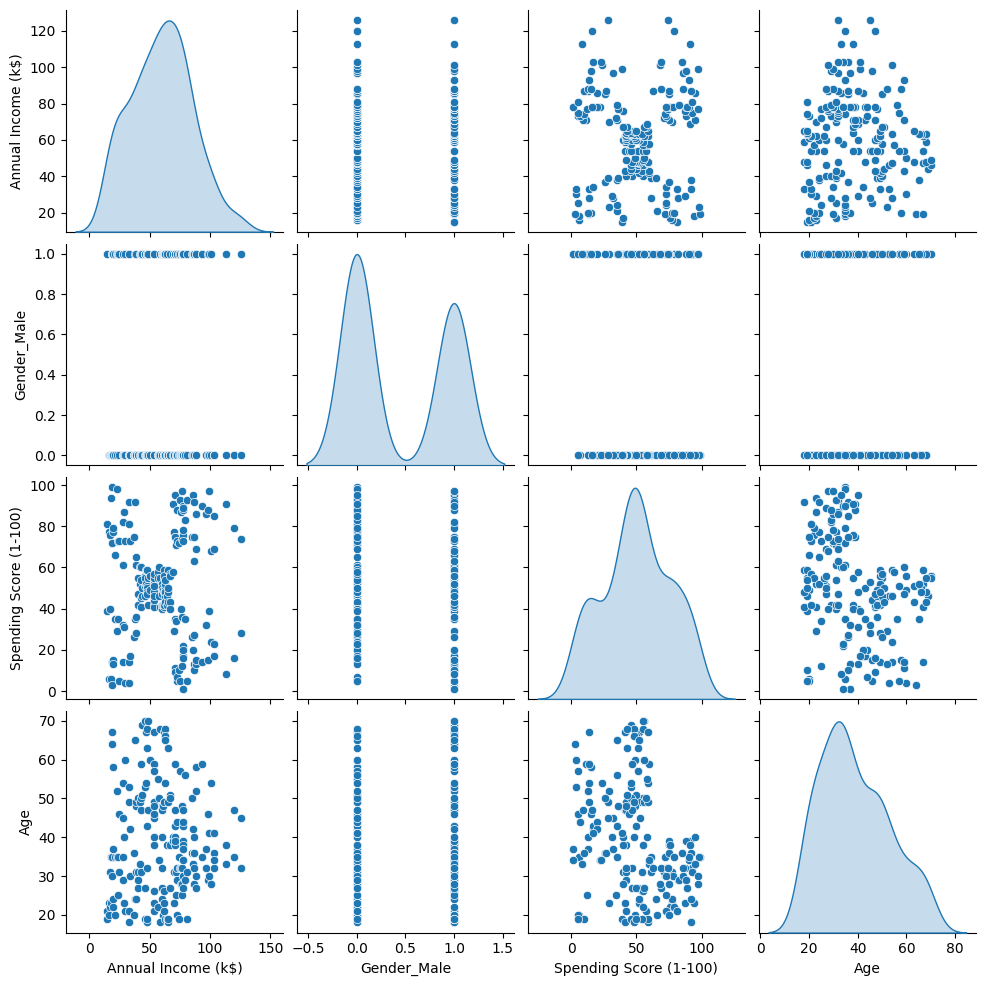

In [113]:
sns.pairplot(df[columns_of_interest], diag_kind='kde', markers='o', palette='viridis')


Model on

KNN clustering

In [114]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
193,38,113,91,0
194,47,120,16,0
195,35,120,79,0
196,45,126,28,0


In [115]:
df = df.drop("Age", axis=1)
df = df.drop("Gender_Male", axis=1)

In [118]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [119]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

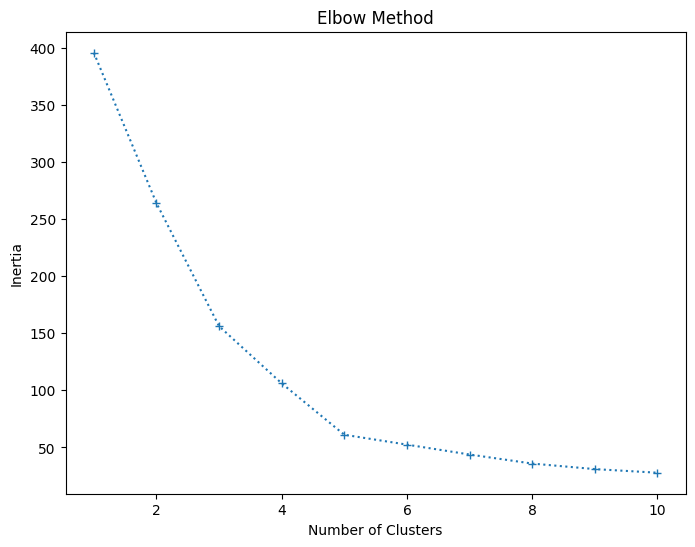

In [120]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='+', linestyle=':')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [121]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)


In [122]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
193,113,91
194,120,16
195,120,79
196,126,28


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      198 non-null    int64
 1   Spending Score (1-100)  198 non-null    int64
dtypes: int64(2)
memory usage: 4.6 KB


In [127]:
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
df['Cluster'] = kmeans.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


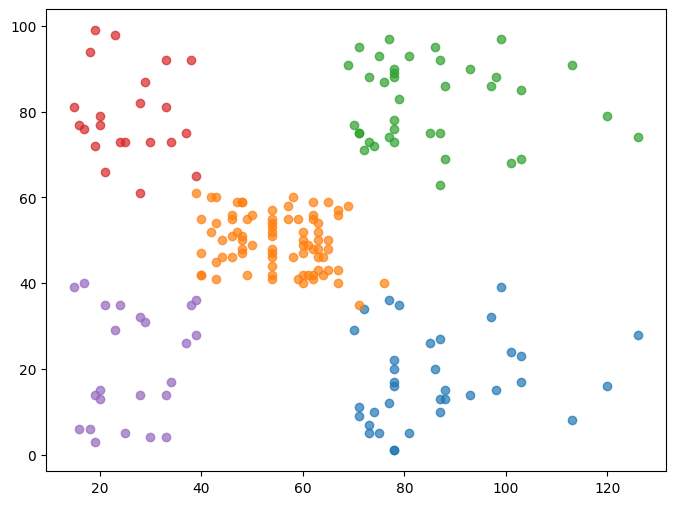

In [128]:
plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(df[df['Cluster'] == cluster]['Annual Income (k$)'],
                df[df['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}',
                alpha=0.7)

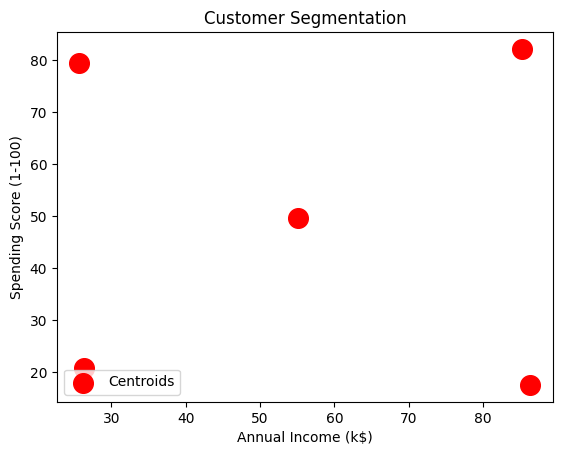

In [129]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.legend()
plt.show()